# Libraires

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.shape

(1000, 17)

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Exploratory Data Analysis

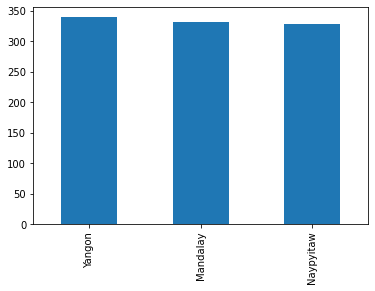

In [10]:
df['City'].value_counts().plot(kind='bar')

In [11]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [13]:
gender_dummies = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [14]:
df = pd.concat([df, gender_dummies], axis=1)

In [15]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,1


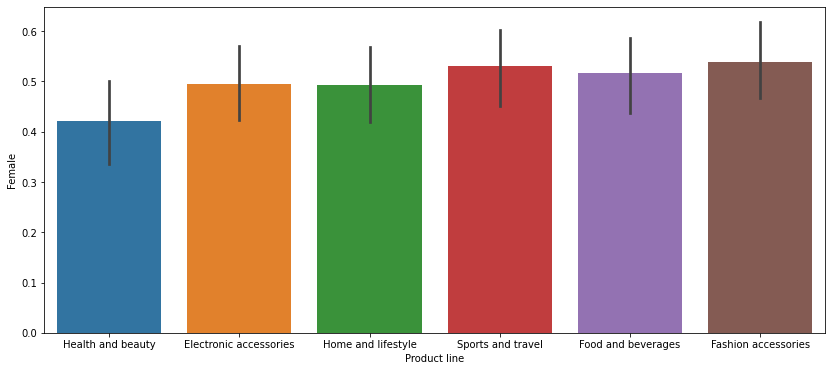

In [16]:
plt.figure(figsize = (14, 6))
sns.barplot(x='Product line', y='Female', data=df)

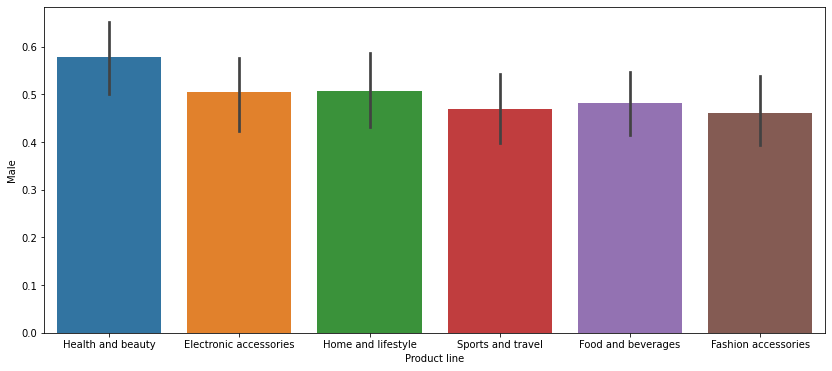

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(x='Product line', y='Male', data=df)

In [24]:
df['Payment'].value_counts().keys()

Index(['Ewallet', 'Cash', 'Credit card'], dtype='object')

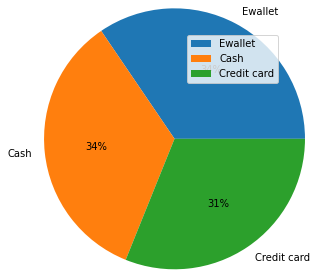

In [26]:
plt.pie(df['Payment'].value_counts(), labels=df['Payment'].value_counts().keys(), autopct='%1.0f%%', radius=1.5)
plt.legend()
plt.show()

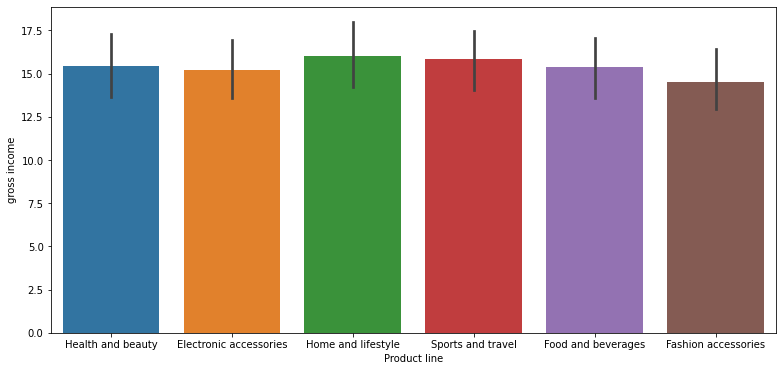

In [27]:
plt.figure(figsize=(13,6))
sns.barplot(x='Product line', y='gross income', data=df)

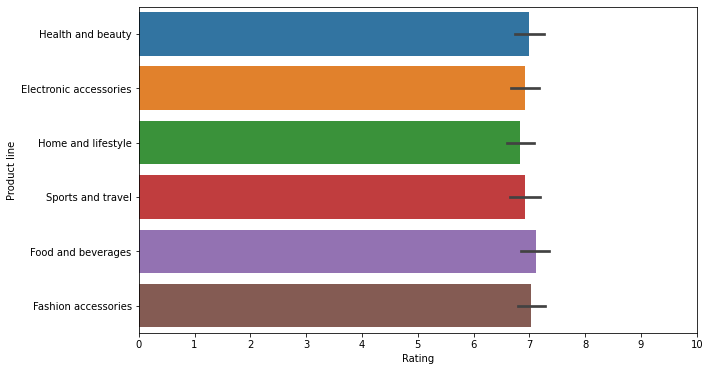

In [29]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,6))
sns.barplot(y=df['Product line'], x=df['Rating'])
plt.xticks(xdata)
plt.show()

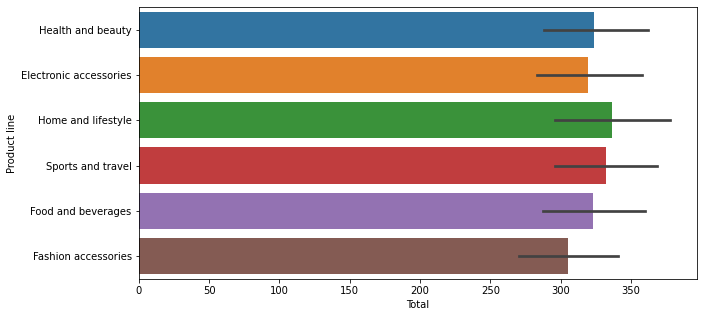

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(y='Product line', x='Total', data=df)

In [31]:
df['Quantity'].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [33]:
data2 = pd.DataFrame(df['Quantity'].value_counts())
data2

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


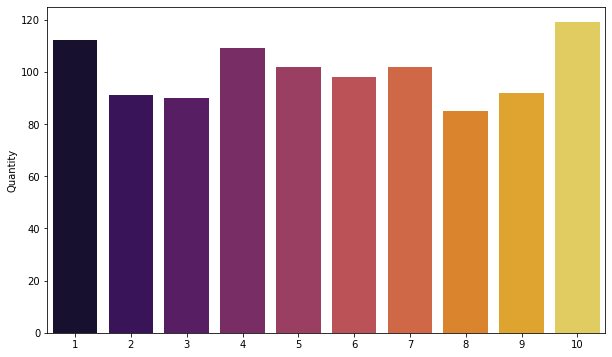

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=data2.index, y=data2['Quantity'], palette='inferno')